<a href="https://colab.research.google.com/github/tzlilLV97/Deep-Learning-Final-Project/blob/main/V2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Deep learning Course



**Project Name** : *Predict League of Legends victory*

Tzlil Lev or 318646510

Alon Feldman  312213135



# Introduction

**Explain on the problem and the task** \\
brief introduction explaining relevant background (if needed), \\
defining the problem, and explaining the project idea and contribution

# Dataset

**explain on the data and the proccess data**  \\
data description, also explain which 
preprocessing tool were used (if used).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import collections

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
PATH_TO_DATA = '/content/gdrive/MyDrive/Colab Notebooks/DNNPROJECT/games.csv' 

Mounted at /content/gdrive


## Data analysis

Load the data set and drop the first columns (gameID, season, create time) - \\
because all "season" is the same, and "gameID" or "createTime" isn't relevante

In [81]:
df = pd.read_csv(PATH_TO_DATA)
df.drop(df.columns[[0,1,3]], axis=1, inplace=True)

### Missing values check



                    Total Missing  Percentage of Total Values
gameDuration                    0                         0.0
t2_champ4_sum1                  0                         0.0
t1_ban4                         0                         0.0
t1_ban5                         0                         0.0
t2_champ1id                     0                         0.0
t2_champ1_sum1                  0                         0.0
t2_champ1_sum2                  0                         0.0
t2_champ2id                     0                         0.0
t2_champ2_sum1                  0                         0.0
t2_champ2_sum2                  0                         0.0
t2_champ3id                     0                         0.0
t2_champ3_sum1                  0                         0.0
t2_champ3_sum2                  0                         0.0
t2_champ4id                     0                         0.0
t2_champ4_sum2                  0                         0.0
winner  

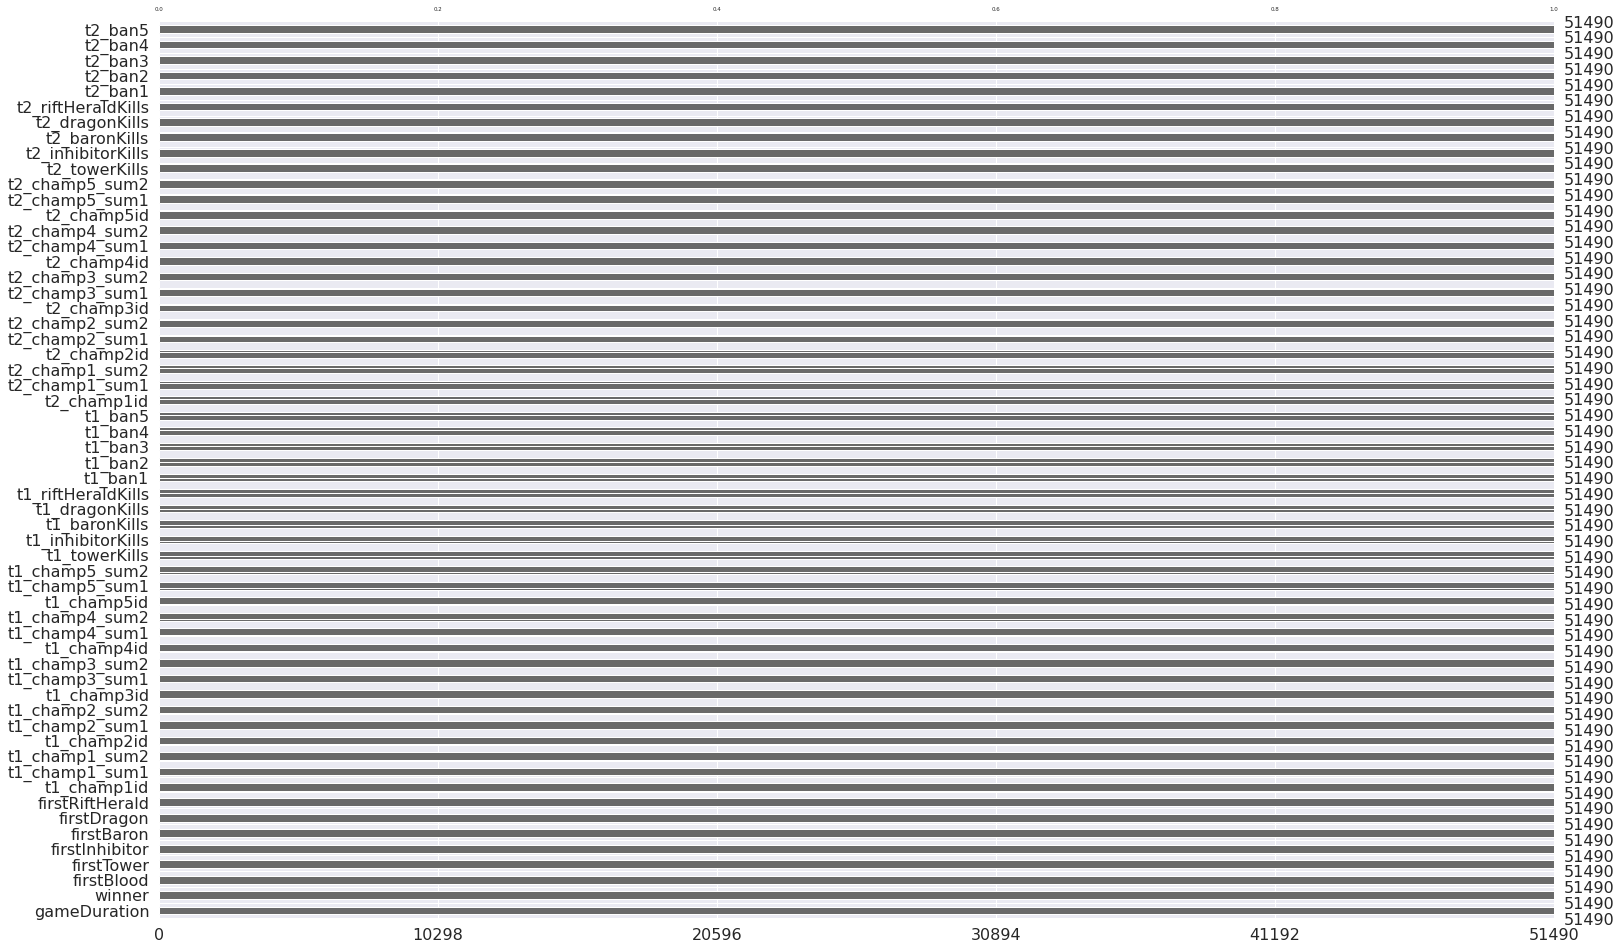

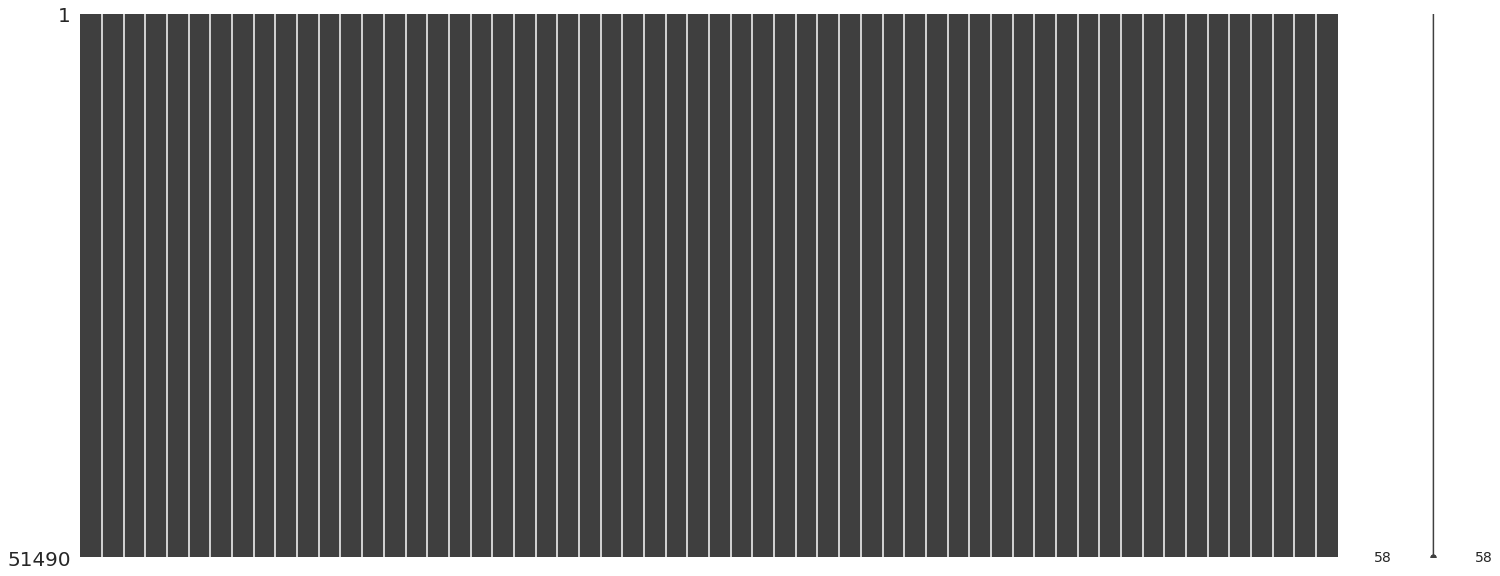

In [12]:
#check for nan values
msno.bar(df)
msno.matrix(df)
#print missing data sorted by percentage of total values
missing_data = pd.DataFrame({'Total Missing': df.isnull().sum(), 'Percentage of Total Values': df.isnull().sum()/len(df)})
print(missing_data.sort_values('Percentage of Total Values', ascending=False))


**conclusion**- We are lucky student - no missing value at all

### Correlation check

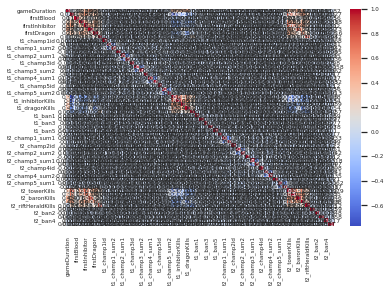

In [6]:
sns.set(font_scale=0.5)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

We can see alot of fetures without any correlation, let's drop them and take a look on the interesting ones:

Index(['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id',
       't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id',
       't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't2_champ1id', 't2_champ2id', 't2_champ3id',
       't2_champ4id', 't2_champ5id', 't2_towerKills', 't2_inhibitorKills',
       't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills'],
      dtype='object')


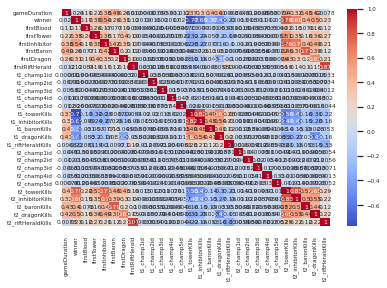

In [7]:
df_partA = pd.read_csv(PATH_TO_DATA).iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 14, 17, 20, 23, 26, 27, 28, 29, 30, 36, 39, 42, 45, 48,  51, 52, 53, 54, 55]]
print(df_partA.columns)
sns.heatmap(df_partA.corr(), cmap='coolwarm', annot=True)

Ok. let us zoom in for more:

Index(['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills',
       't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills',
       't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills'],
      dtype='object')


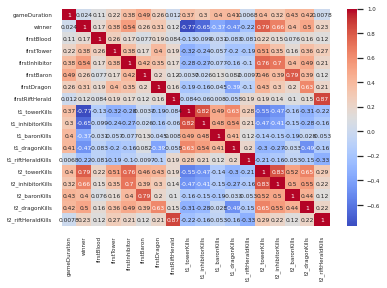

In [8]:
df_partB = pd.read_csv(PATH_TO_DATA).iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 26, 27, 28, 29, 30, 51, 52, 53, 54, 55]]
print(df_partB.columns)
sns.heatmap(df_partB.corr(), cmap='coolwarm', annot=True)

Now the same thing but with the champions:

Index(['gameDuration', 'winner', 't1_champ1id', 't1_champ2id', 't1_champ3id',
       't1_champ4id', 't1_champ5id', 't2_champ1id', 't2_champ2id',
       't2_champ3id', 't2_champ4id', 't2_champ5id'],
      dtype='object')


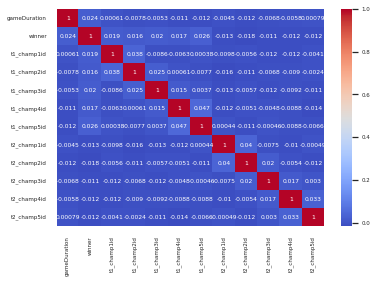

In [9]:
df_partC = pd.read_csv(PATH_TO_DATA).iloc[:, [2, 4, 11, 14, 17, 20, 23,  36, 39, 42, 45, 48,]]
print(df_partC.columns)
sns.heatmap(df_partC.corr(), cmap='coolwarm', annot=True)

Here we try to check if there corelation between the champions and there spells


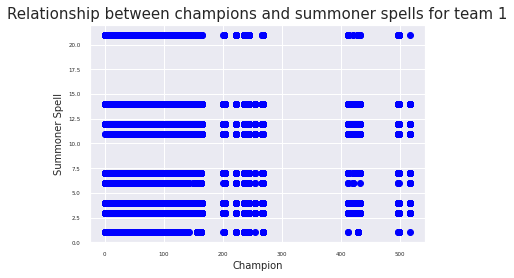

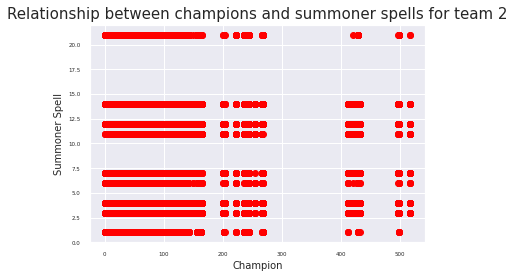

In [53]:
#plot relastionship between all champions and summoner spells in one graph for t1 and another graph for t2
#add title and axis names
plt.scatter(df['t1_champ1id'], df['t1_champ1_sum1'], color = 'blue')
plt.scatter(df['t1_champ2id'], df['t1_champ2_sum1'], color = 'blue')
plt.scatter(df['t1_champ3id'], df['t1_champ3_sum1'], color = 'blue')
plt.scatter(df['t1_champ4id'], df['t1_champ4_sum1'], color = 'blue')
plt.scatter(df['t1_champ5id'], df['t1_champ5_sum1'], color = 'blue')
plt.scatter(df['t1_champ1id'], df['t1_champ1_sum2'], color = 'blue')
plt.scatter(df['t1_champ2id'], df['t1_champ2_sum2'], color = 'blue')
plt.scatter(df['t1_champ3id'], df['t1_champ3_sum2'], color = 'blue')
plt.scatter(df['t1_champ4id'], df['t1_champ4_sum2'], color = 'blue')
plt.scatter(df['t1_champ5id'], df['t1_champ5_sum2'], color = 'blue')
plt.title('Relationship between champions and summoner spells for team 1',fontsize=15)
plt.xlabel('Champion',fontsize=10)
plt.ylabel('Summoner Spell',fontsize=10)
plt.show()

plt.scatter(df['t2_champ1id'], df['t2_champ1_sum1'], color = 'red')
plt.scatter(df['t2_champ2id'], df['t2_champ2_sum1'], color = 'red')
plt.scatter(df['t2_champ3id'], df['t2_champ3_sum1'], color = 'red')
plt.scatter(df['t2_champ4id'], df['t2_champ4_sum1'], color = 'red')
plt.scatter(df['t2_champ5id'], df['t2_champ5_sum1'], color = 'red')
plt.scatter(df['t2_champ1id'], df['t2_champ1_sum2'], color = 'red')
plt.scatter(df['t2_champ2id'], df['t2_champ2_sum2'], color = 'red')
plt.scatter(df['t2_champ3id'], df['t2_champ3_sum2'], color = 'red')
plt.scatter(df['t2_champ4id'], df['t2_champ4_sum2'], color = 'red')
plt.scatter(df['t2_champ5id'], df['t2_champ5_sum2'], color = 'red')
plt.title('Relationship between champions and summoner spells for team 2',fontsize=15)
plt.xlabel('Champion',fontsize=10)
plt.ylabel('Summoner Spell',fontsize=10)
plt.show()

And now only with the first kills:

Index(['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald'],
      dtype='object')


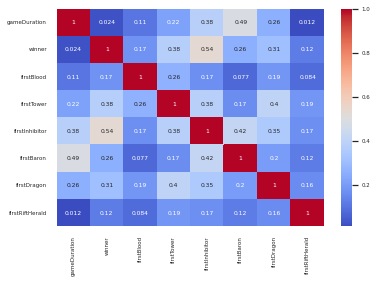

In [55]:
df_partD = pd.read_csv(PATH_TO_DATA).iloc[:, [2, 4, 5, 6, 7, 8, 9, 10]]
print(df_partD.columns)
sns.heatmap(df_partD.corr(), cmap='coolwarm', annot=True)

Finally, with total kills:

Index(['gameDuration', 'winner', 't1_towerKills', 't1_inhibitorKills',
       't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills'],
      dtype='object')


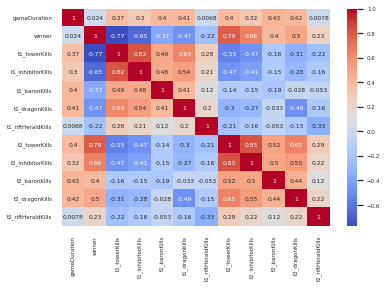

In [11]:
df_partE = pd.read_csv(PATH_TO_DATA).iloc[:, [2, 4, 26, 27, 28, 29, 30, 51, 52, 53, 54, 55]]
print(df_partE.columns)
sns.heatmap(df_partE.corr(), cmap='coolwarm', annot=True)

**conclusion**- Look like the champions names as almost zero correlation with the winner or the other features, and as for their spells, it look uniformaly distributed so we will drop them both. 
the higest correlation with the winner as suspected are the numbers of kills (scores getting in game) and in some cases - who get the first kill of something importent (like the inharation)

### Balance check

Let us check if the label feature (win) are same same

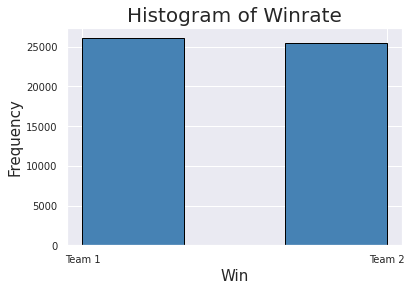

In [73]:
plt.title('Histogram of Winrate',fontsize=20)
plt.xlabel('Win',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.hist(df['winner'],edgecolor='black',color='steelblue', histtype='bar',bins=3)
plt.xticks([1,2],['Team 1','Team 2'],fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.show() 

Same check for all "first" things we have


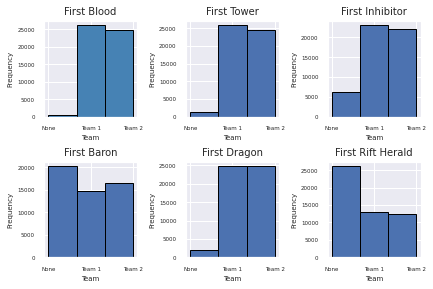

In [51]:
#plot histogram of "first" variables, all in one picture,2 bins, "1" in blue "2" in red
#add title and axis names
fig, axs = plt.subplots(2, 3)
ax0, ax1, ax2, ax3, ax4, ax5 = axs.flatten()
ax0.hist(df['firstBlood'], ec = 'black',histtype='bar',bins=3,color='steelblue')
ax0.set_title('First Blood',fontsize=10)
ax0.set_xlabel('Team',fontsize=7)
ax0.set_ylabel('Frequency',fontsize=7)
ax1.hist(df['firstTower'], edgecolor = 'black',histtype='bar', bins = 3)
ax1.set_title('First Tower',fontsize=10)
ax1.set_xlabel('Team',fontsize=7)
ax1.set_ylabel('Frequency',fontsize=7)
ax2.hist(df['firstInhibitor'],  edgecolor = 'black',histtype='bar', bins = 3)
ax2.set_title('First Inhibitor',fontsize=10)
ax2.set_xlabel('Team',fontsize=7)
ax2.set_ylabel('Frequency',fontsize=7)
ax3.hist(df['firstBaron'], edgecolor = 'black',histtype='bar', bins = 3)
ax3.set_title('First Baron',fontsize=10)
ax3.set_xlabel('Team',fontsize=7)
ax3.set_ylabel('Frequency',fontsize=7)
ax4.hist(df['firstDragon'],edgecolor = 'black',histtype='bar', bins = 3)
ax4.set_title('First Dragon',fontsize=10)
ax4.set_xlabel('Team',fontsize=7)
ax4.set_ylabel('Frequency',fontsize=7)
ax5.hist(df['firstRiftHerald'], edgecolor = 'black',histtype='bar', bins = 3)
ax5.set_title('First Rift Herald',fontsize=10)
ax5.set_xlabel('Team',fontsize=7)
ax5.set_ylabel('Frequency',fontsize=7)
plt.setp(axs, xticks=[0,1,2], xticklabels=['None','Team 1','Team 2'])

fig.tight_layout()


For the number of kills, we will check by boxplot

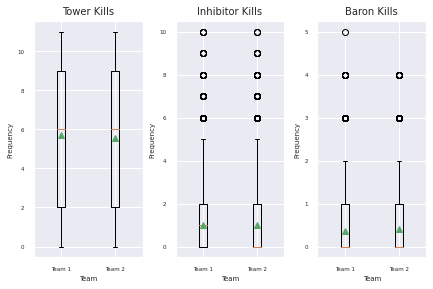

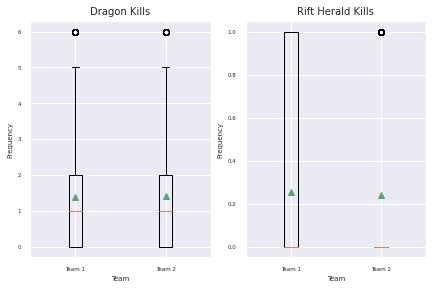

Rift Herald Kills: 
 Team 1 =  12948  Team 2 =  12363


In [69]:
fig, axs = plt.subplots(1, 3)
ax0, ax1, ax2 = axs.flatten()
ax0.boxplot([df['t1_towerKills'],df['t2_towerKills']], labels = ['Team 1','Team 2'],
            patch_artist=False,showmeans=True)
ax0.set_title('Tower Kills',fontsize=10)
ax0.set_xlabel('Team',fontsize=7)
ax0.set_ylabel('Frequency',fontsize=7)
ax1.boxplot([df['t1_inhibitorKills'],df['t2_inhibitorKills']], labels = ['Team 1','Team 2'],
            patch_artist=False,showmeans=True)
ax1.set_title('Inhibitor Kills',fontsize=10)
ax1.set_xlabel('Team',fontsize=7)
ax1.set_ylabel('Frequency',fontsize=7)
ax2.boxplot([df['t1_baronKills'],df['t2_baronKills']], labels = ['Team 1','Team 2'],
            patch_artist=False,showmeans=True)
ax2.set_title('Baron Kills',fontsize=10)
ax2.set_xlabel('Team',fontsize=7)
ax2.set_ylabel('Frequency',fontsize=7)
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2)
ax3, ax4 = axs.flatten()
ax3.boxplot([df['t1_dragonKills'],df['t2_dragonKills']], labels = ['Team 1','Team 2'],
            patch_artist=False,showmeans=True)
ax3.set_title('Dragon Kills',fontsize=10)
ax3.set_xlabel('Team',fontsize=7)
ax3.set_ylabel('Frequency',fontsize=7)
ax4.boxplot([df['t1_riftHeraldKills'],df['t2_riftHeraldKills']], labels = ['Team 1','Team 2'],
            patch_artist=False,showmeans=True)
ax4.set_title('Rift Herald Kills',fontsize=10)
ax4.set_xlabel('Team',fontsize=7)
ax4.set_ylabel('Frequency',fontsize=7)

fig.tight_layout()
plt.show()

print("Rift Herald Kills: \n Team 1 = ",df['t1_riftHeraldKills'].sum()," Team 2 = ",df['t2_riftHeraldKills'].sum())

Game duration boxplot

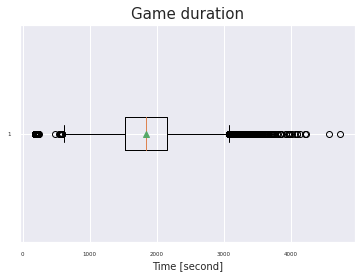

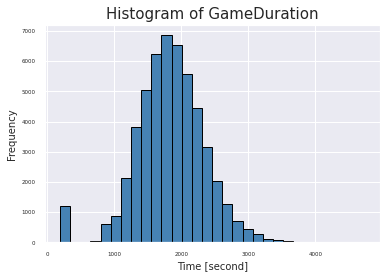

In [76]:
plt.boxplot(df['gameDuration'],showmeans=True, vert=False)
plt.title("Game duration", fontsize=15)
plt.xlabel('Time [second]', fontsize=10)
plt.show()
plt.title('Histogram of GameDuration',fontsize=15)
plt.xlabel('Time [second]',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.hist(df['gameDuration'],edgecolor='black',color='steelblue', histtype='bar',bins=30)
plt.show() 

**conclusion**- Look like the data is indeed balance (i.e the number of times team1 win is almost equal to the number of time that team2 win, and so on to the other feature). \\
As for the "first kill" features- the *None* indicate that none of the teams get a kill of this type.  \\
As for the number of kills - in the boxplot we can see the median (orange line) and the mean (green arrow) are always the same - so it also balanced. as for outlier- we have a minor outlier so we belive a normalization (scale) will succsesfully outcome this. \\
for some reason the boxplot of "Rift Hearald Kills" not showing the box of Team2, but the mean and meadin are the same and we print the total number below and it look almost the same.
Game duration- we need to delete the outlier samples- i.e the seperate bin on the left, we exaim the samples and it appear that in this games one of the team decied to surrender\quit for some reason, but it is a short game (200 second +-) with almot not kills (1 at most).


### Conclustion

*   The data is correct- no missing values, the feauters are balanced, minor outlier that a normalization will fix. 
*   Features selections- from the correlation analysis we decide to drop the champions ID and their spells as it look like no relevante
*   The "game duration" feature-it is a high numeric values with 1 extream bin of outliers- we will drop the samples under 239 sec and normilize the rest using log







## Data preparation

In [80]:
def data_preparation(df_first):
    # copy only the feature we decide to use (whitout the label!)
    df = df_first.iloc[:, [2, 5, 6, 7, 8, 9, 10, 11, 14, 17, 20, 23, 26, 27, 28, 29, 30, 36, 39, 42, 45, 48,  51, 52, 53, 54, 55]]
    # drop the outlier in gameDuration and normalzie
    df = df.drop(df[df.gameDuration<240].index, axis=0)
    df['gameDuration'] = df['gameDuration'].apply(lambda x: np.log(x))
    # label vector - we want it to be '0' or '1' and not '1' or '2' (the winning team)
    labels = df_first.iloc[:, 4].to_numpy() - 1
    df = df.to_numpy()
    return df, labels

def get_train_val_test(data,labels):
  n=len(data)
  #shuffle
  reindex = np.random.permutation(n)
  data=data[reindex]
  labels=labels[reindex]
  #make the label one_hot vector
  labels = [np.eye(2)[label] for label in labels]
  #seperate test,validation and training set
  len_train = int(0.8 * n)
  len_test = (n-int(len_train))//2
  len_val = len_test
  train, val, test = (data[:len_train],labels[:len_train]), \
      (data[len_train:len_train+len_test],labels[len_train:len_train+len_test]),\
      (data[len_train+len_test:],labels[len_train+len_test:])
  return train, val, test

def get_batch(data,labels, start, end):
    try:
      x = data[start:end]
      s = labels[start:end]
      return x, s
    except:
      x = data[start:]
      s = labels[start:]
      return x,s

df = pd.read_csv(PATH_TO_DATA)
data, labels = data_preparation(df)
train, valid, test = get_train_val_test(data,labels)


# Limitations

**explain** if there were some known challenges in the project (noise and
artifact in the data, small size of dataset, annotation inconsistencies, etc.) and explain
how you addressed them.

# Network

**explain** describe the used architecture, training parameters, losses, optimizers,
etc.


# Benchmark

**explain **conduct an ablation study and show results for different parameter settings
(metric results and graphs), show training graphs (convergence/divergence),
comparison to SOTA, i.e. state-of-the-art, results (if possible), explain which
parameters performed best and how you chose them. Please report not only the
best results you obtained, but also explain and show us the process you have
undergone in tunning and optimizing your trained model.


**BENCHMARK**

*We need to take some benckmark pictures from the kaggle batch*

In order to evalute our model, we compared it to different models, to 

observe the results and compare them to our network. 

We choose the following models:


* XGBoost

* Random Forest

* KNN

* SVM


The Following Code is the implementation of each of them


In [ ]:
### SVM 

def estimate_accuracy_svm(model, data, labels, batch_size=5000, max_N=100000):
    """
    Estimate the accuracy of the model on the data. To reduce
    computation time, use at most `max_N` elements of `data` to
    produce the estimate.
    """
    correct = 0
    N = 0
    for i in range(0, len(data), batch_size):
        # get a batch of data
        xt, st = get_batch(data, labels, i, i + batch_size)
        # forward pass prediction
        y = model.predict(xt)
        pred = np.squeeze(y)
        correct += np.sum(pred==st)
        N += len(st)

        if N > max_N:
            break
    return correct / N



def svmModel(train, valid, test):
    x_train, y_train = train
    x_valid, y_valid = valid
    x_test, y_test = test
    svm_model = svm.SVC()
    svm_model.fit(x_train, y_train)
    y_pred = svm_model.predict(x_test)
    print("SVM Accuracy on validation set: {:.2f}%".format(estimate_accuracy_svm(svm_model, x_valid, y_valid) * 100))
    print("SVM Accuracy on test set: {:.2f}%".format(estimate_accuracy_svm(svm_model, x_test, y_test) * 100))


svmModel(train, valid, test)
         



SVM Accuracy on validation set: 94.08%
SVM Accuracy on test set: 93.88%


In [ ]:
### KNN
def estimate_accuracy_KNN(model, data, labels, batch_size=5000, max_N=100000):
    """
    Estimate the accuracy of the model on the data. To reduce
    computation time, use at most `max_N` elements of `data` to
    produce the estimate.
    """

    correct = 0
    N = 0
    for i in range(0, len(data), batch_size):
        # get a batch of data
        xt, st = get_batch(data, labels, i, i + batch_size)
        # forward pass prediction
        y = model.predict(xt)
        pred = np.squeeze(y)
        correct += np.sum(pred==st)
        N += len(st)
        if N > max_N:
            break
    return correct / N

def KNN(train,valid,test):
    x_train, y_train = train
    x_valid, y_valid = valid
    x_test, y_test = test
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("KNN Accuracy on validation set: {:.2f}%".format(estimate_accuracy_KNN(model, x_valid, y_valid) * 100))
    print("KNN Accuracy on test set: {:.2f}%".format(estimate_accuracy_KNN(model, x_test, y_test) * 100))

KNN(train, valid, test)

KNN Accuracy on validation set: 50.42%
KNN Accuracy on test set: 52.22%


In [ ]:
### XGBoost

def compare_xgb_predictions(xgb_model, X, y):
    # Make predictions using the trained model
    global n, y_test,x_test,x_valid,y_valid
    xgb_predictions = xgb_model.predict(X)

    # Round the predictions to 0 or 1
    xgb_predictions = [round(pred) for pred in xgb_predictions]

    # Compare the predictions with the real labels
    correct = 0
    total = len(X)
    for pred, label in zip(xgb_predictions, y):
        if pred == label:
            correct += 1
    # Calculate the accuracy of the predictions
    accuracy = correct / total
    return accuracy



  
def xgb_classifier(train,valid,test):
    global n, y_test,x_test,x_valid,y_valid
    x_train, y_train = train
    x_valid, y_valid = valid
    x_test, y_test = test
    #  Write your code here
    model = xgb.XGBClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
  #  print(classification_report(y_test, y_pred))
    print("XGB Accuracy on validation set: {:.2f}%".format(compare_xgb_predictions(model, x_valid, y_valid) * 100))
    print("XGB Accuracy on test set: {:.2f}%".format(compare_xgb_predictions(model, x_test, y_test) * 100))
          #"compare_xgb_predictions(model, x_test, y_test))

xgb_classifier(train, valid, test)

XGB Accuracy on validation set: 97.28%
XGB Accuracy on test set: 97.30%


Random Forest

In [ ]:
def random_forest(train_data, validation_data, test_data):
    # Create a random forest classifier
    clf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=0)

    # Train the classifier
    clf.fit(train_data[0], train_data[1])

    # Predict the labels of the test set
    preds = clf.predict(validation_data[0])

    # Compute the accuracy: accuracy
    accuracy = accuracy_score(validation_data[1], preds)
    print("Random Forest Accuracy on Validation Set: %.2f%%" % (accuracy * 100))
    print("Random Forest Accuracy on Training Set: %.2f%%" % (accuracy_score(train_data[1], clf.predict(train_data[0])) * 100))
    print("Random Forest Accuracy on Test Set: %.2f%%" % (accuracy_score(test_data[1], clf.predict(test_data[0])) * 100))

def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

random_forest(train, valid, test)

Random Forest Accuracy on Validation Set: 97.40%
Random Forest Accuracy on Training Set: 99.42%
Random Forest Accuracy on Test Set: 97.49%


ADD here a table that summerize all the benchmark resulte

#  Result analysis

**explain** the results (e.g., how did you know when to stop training),
which insights were gained from the ablation study, etc.


# Conclusion

**explain** provide a brief project summary.


# References

bla bla

# NN implemente

Add explaination of what kind of arcitecture we are going to test,
explaine the different hyper parameters we try (optimizres, activation function, num of hidden and setera)

Accuracy estimation 

In [ ]:



def estimate_accuracy_torch(model, data, labels, batch_size=5000, max_N=100000):
  """
  Estimate the accuracy of the model on the data. To reduce
  computation time, use at most `max_N` elements of `data` to
  produce the estimate.
  """

  correct = 0
  N = 0
  for i in range(0, len(data), batch_size):
      # get a batch of data
      xt, st = get_batch(data, labels, i, i + batch_size)
      # forward pass prediction
      y = model(torch.Tensor(xt))
      y = y.detach().numpy()  # convert the PyTorch tensor => numpy array
      y = np.where(y > 0.5, 1, 0)
      pred = np.squeeze(y)
      correct += np.sum(pred==st)
      N += len(st)

      if N > max_N:
          break
  return correct / N




  

Neural Network

In [ ]:
class PyTorchMLP2(nn.Module):
    def _init_(self, num_hidden=5):
        super(PyTorchMLP, self)._init_()
        self.input_size = 27  # input_size
        self.hidden_size = 50 # hidden_size was 50
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.fc3 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.fc4 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.fc5 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.fc6 = torch.nn.Linear(self.hidden_size, 1)
       # self.dropout = torch.nn.Dropout(0.1)
       # self.optimizer2 = torch.optim.RMSprop(self.parameters())
       #  self.sigmoid = F.sigmoid()
       #  self.tanh = F.tanh()
        self.normalizer = torch.nn.GroupNorm(1, self.hidden_size)
    def forward(self, inp):
        hidden1 = self.fc1(inp)
        relu1 = F.relu(hidden1)
  #      bypass = self.fc6(relu1)
        hidden2 = self.fc2(relu1)
        # Add bypass branch
        bypass = self.fc6(hidden1)
        relu3 = F.sigmoid(hidden2)
        output = self.fc6(relu3)
        # Combine bypass and regular outputs
        #output = F.sigmoid(bypass+ output)
        output = F.sigmoid(output)
        return output
    # def forward(self, inp):
    #     hidden1 = self.fc1(inp)
    #     relu1 = self.relu(hidden1)
    #     ##ADD BYPASS BRANCH
    #     bypass = self.fc6(relu1)
    #     hidden2 = self.fc2(relu1)
    #     relu2 = self.relu(hidden2)
    #     hidden3 = self.fc3(relu2)
    #     relu3 = self.relu(hidden3)
    #     output = self.fc6(relu3)
    #     ##COMBINE BYPASS AND REGULAR OUTPUTS
    #     return self.sigmoid(output+bypass)


In [ ]:
def estimate_accuracy_torch(model, data, labels, batch_size=5000, max_N=100000):
    """
    Estimate the accuracy of the model on the data. To reduce
    computation time, use at most `max_N` elements of `data` to
    produce the estimate.
    """

    correct = 0
    N = 0
    for i in range(0, len(data), batch_size):
        # get a batch of data
        xt, st = get_batch(data, labels, i, i + batch_size)
        # forward pass prediction
        y = model(torch.Tensor(xt))
        y = y.detach().numpy()  # convert the PyTorch tensor => numpy array
        y = np.where(y > 0.5, 1, 0)
        pred = np.squeeze(y)
        correct += np.sum(pred==st)
        N += len(st)

        if N > max_N:
            break
    return correct / N

def plot_learning_curve(iters, losses, iters_sub, train_accs, val_accs):
  """
  Plot the learning curve.
  """
  plt.title("Learning Curve: Loss per Iteration")
  plt.plot(iters, losses, label="Train")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()

  plt.title("Learning Curve: Accuracy per Iteration")
  plt.plot(iters_sub, train_accs, label="Train")
  plt.plot(iters_sub, val_accs, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.show()

def make_prediction_torch(model, game_data):

  b = game_data
  toBePredicted = torch.Tensor(b)
  print(toBePredicted)
  output = model(toBePredicted)
  print(output)
  #  Write your code here

def train_model(model, train_data,validation_data,test_data,
                                batch_size=100,
                                learning_rate=0.001,
                                weight_decay=0,
                                epochs=1000):

  ##COSTS
 # criterion =nn.BCELoss()# nn.CrossEntropyLoss()
  #criterion = nn.NLLLoss()
  criterion = nn.MSELoss()
  #criterion = nn.CrossEntropyLoss()



  ##EXTRA FEATURES
  # droper = nn.Dropout(p=0.1)
  droper = 0

  ## OPTIMIZERS
  #optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
  optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)





  
  iters, losses = [], []
  iters_sub, train_accs, val_accs = [], [], []

  n = 0  # the number of iterations
  for n in range(0,epochs):
      for i in range(0, train_data[0].shape[0], batch_size):
          # get the input and targets of a minibatch
          xt, st = get_batch(train_data[0],train_data[1], i, i + batch_size)

          ## Create normalized data
          # xt,mio,sigma = probabilistic_normalization(xt)
          # convert from numpy arrays to PyTorch tensors
          xt = torch.Tensor(xt)
          st = torch.Tensor(st).float().unsqueeze(1)
          if droper:
              zs = model(droper(xt)) # compute prediction logit, use dropout if wanted
          else:
              zs = model(xt)
          loss = criterion(st, zs)  # compute the total loss
          loss.backward()  # compute updates for each parameter
          optimizer.step()  # make the updates for each parameter
          optimizer.zero_grad()  # a clean up step for PyTorch
          # save the current training information
          iters.append(i)
          losses.append(float(loss) / batch_size)  # compute average loss

          if i % 10 == 0:
          #    print(classification_report(zs.detach().numpy(),st.detach().numpy()))
          #    continue
              iters_sub.append(i)
              train_cost = float(loss.detach().numpy())
              train_acc = estimate_accuracy_torch(model, train_data[0],train_data[1])
              train_accs.append(train_acc)
              val_acc = estimate_accuracy_torch(model, validation_data[0], validation_data[1])
              val_accs.append(val_acc)
          #    print("Iter %d. [Val Acc %.0f%%] [Train Acc %.0f%%, Loss %f]" % (
          #        n, val_acc * 100, train_acc * 100, train_cost))
  train_cost = float(loss.detach().numpy())
  train_acc = estimate_accuracy_torch(model, train_data[0], train_data[1])
  train_accs.append(train_acc)
  val_acc = estimate_accuracy_torch(model,validation_data[0], validation_data[1])
  val_accs.append(val_acc)
  # print("Iter %d. [Val Acc %.0f%%] [Train Acc %.0f%%, Loss %f]" % (
  #     n, val_acc * 100, train_acc * 100, train_cost))
  print("NN Accuracy on Validation Set: %.2f%%" % (val_acc * 100))
  print("NN Accuracy on Training Set: %.2f%%" % (train_acc * 100))
  print("NN Accuracy on Test Set: %.2f%%" % (estimate_accuracy_torch(model, test_data[0], test_data[1]) * 100))
  return iters, losses, iters_sub, train_accs, val_accs


**Neural Network Models**

We want to examine several architectures to determine which will be the most suitable one. 

First, We'll implement a standard 3-layers Neural Network, and see how the data is handled. we'll use SGD and BCE optimizer. 

** haara : Our labels is in 1 or 2, we reduce it by 1 so it will by binary output.

First Network implementaiton : 

In [ ]:
class PyTorchMLP2(nn.Module):
    def __init__(self, num_hidden=50):
        super(PyTorchMLP2, self).__init__()
        self.input_size = 27  # input_size
        self.hidden_size = num_hidden # hidden_size was 50
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        self.fc3 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, inp):
        hidden1 = self.fc1(inp)
        hidden1 = self.relu(hidden1)
        hidden1 = self.fc2(hidden1)
        hidden1 = self.relu(hidden1)
        output = self.fc3(hidden1)
     #   output = self.sigmoid(output)
        return output

In [ ]:
pytorch_mlp = PyTorchMLP2()
learning_curve_info = train_model(pytorch_mlp, train,valid ,test,batch_size=5000,
                            learning_rate=0.001,
                            weight_decay=0.0000000,
                            epochs=100)

NN Accuracy on Validation Set: 88.19%
NN Accuracy on Training Set: 88.71%
NN Accuracy on Test Set: 88.04%
